In [0]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io

In [2]:
# Upload csv files from local machine
uploaded = files.upload()

Saving tokyo_station_data.csv to tokyo_station_data.csv
Saving tokyo_station_objects_data.csv to tokyo_station_objects_data.csv
Saving tokyo_station_timetable_data.csv to tokyo_station_timetable_data.csv


In [3]:
# Create station data dataframe
station_data = pd.read_csv(io.BytesIO(uploaded['tokyo_station_data.csv']))

station_data.head()

,date,title,geo_lat,geo_lon,connecting_railway,operator,railway,station_code
0,2019-07-16 14:00:00+09:00,大師前,35.77895,139.78165,0,Tobu,Tobu.Daishi,TS-51
1,2019-07-16 14:00:00+09:00,西新井,35.77728,139.79037,1,Tobu,Tobu.Daishi,TS-13
2,2018-07-27 16:00:00+09:00,八千代緑が丘,NaN,NaN,0,ToyoRapid,ToyoRapid.ToyoRapid,TR06
3,2018-07-30 17:00:00+09:00,修善寺,NaN,NaN,0,IzuHakone,IzuHakone.Sunzu,IS13
4,2018-07-30 17:00:00+09:00,伊豆急下田,NaN,NaN,0,Izukyu,Izukyu.Izukyu,IZ16


In [4]:
# Create station objects dataframe
station_objects = pd.read_csv(io.BytesIO(uploaded['tokyo_station_objects_data.csv']))

station_objects.head()

,departure_time,destination_station,train_type
0,2019-07-27 05:04:00,Minatomirai.Minatomirai.MotomachiChukagai,kyu.Local
1,2019-07-27 05:19:00,Minatomirai.Minatomirai.MotomachiChukagai,kyu.Local
2,2019-07-27 05:33:00,Minatomirai.Minatomirai.MotomachiChukagai,kyu.Local
3,2019-07-27 05:47:00,Minatomirai.Minatomirai.MotomachiChukagai,kyu.Local
4,2019-07-27 05:54:00,Minatomirai.Minatomirai.MotomachiChukagai,kyu.Express


In [6]:
# Create station timetable dataframe
station_timetable = pd.read_csv(io.BytesIO(uploaded['tokyo_station_timetable_data.csv']))

station_timetable.head()

,date,issued,calendar,operator,rail_direction,railway,station
0,2019-04-25 16:00:00+09:00,2019-04-25 16:00:00+09:00,Weekday,Tokyu,Outbound,Tokyu.Toyoko,Tokyu.Toyoko.NakaMeguro
1,2019-04-25 15:00:00+09:00,2019-04-25 15:00:00+09:00,SaturdayHoliday,TokyoMetro,TokyoMetro.KitaAyase,TokyoMetro.Chiyoda,TokyoMetro.Chiyoda.Akasaka
2,2019-04-25 15:00:00+09:00,2019-04-25 15:00:00+09:00,Weekday,TokyoMetro,TokyoMetro.KitaAyase,TokyoMetro.Chiyoda,TokyoMetro.Chiyoda.Akasaka
3,2019-04-25 15:00:00+09:00,2019-04-25 15:00:00+09:00,SaturdayHoliday,TokyoMetro,TokyoMetro.YoyogiUehara,TokyoMetro.Chiyoda,TokyoMetro.Chiyoda.Akasaka
4,2019-04-25 16:00:00+09:00,2019-04-25 16:00:00+09:00,SaturdayHoliday,Tokyu,Inbound,Tokyu.Toyoko,Tokyu.Toyoko.Okurayama


In [7]:
# Merge station data with station timetable on railway
station_df = station_data.merge(station_timetable, on='railway')

print(station_df.shape)
station_df.head()

(10738, 14)


,date_x,title,geo_lat,geo_lon,connecting_railway,operator_x,railway,station_code,date_y,issued,calendar,operator_y,rail_direction,station
0,2019-07-16 14:00:00+09:00,大師前,35.77895,139.78165,0,Tobu,Tobu.Daishi,TS-51,2019-04-25 16:00:00+09:00,2019-04-25 16:00:00+09:00,SaturdayHoliday,Tobu,Inbound,Tobu.Daishi.Daishimae
1,2019-07-16 14:00:00+09:00,大師前,35.77895,139.78165,0,Tobu,Tobu.Daishi,TS-51,2019-04-25 16:00:00+09:00,2019-04-25 16:00:00+09:00,Weekday,Tobu,Inbound,Tobu.Daishi.Daishimae
2,2019-07-16 14:00:00+09:00,大師前,35.77895,139.78165,0,Tobu,Tobu.Daishi,TS-51,2019-04-25 16:00:00+09:00,2019-04-25 16:00:00+09:00,SaturdayHoliday,Tobu,Outbound,Tobu.Daishi.Nishiarai
3,2019-07-16 14:00:00+09:00,大師前,35.77895,139.78165,0,Tobu,Tobu.Daishi,TS-51,2019-04-25 16:00:00+09:00,2019-04-25 16:00:00+09:00,Weekday,Tobu,Outbound,Tobu.Daishi.Nishiarai
4,2019-07-16 14:00:00+09:00,西新井,35.77728,139.79037,1,Tobu,Tobu.Daishi,TS-13,2019-04-25 16:00:00+09:00,2019-04-25 16:00:00+09:00,SaturdayHoliday,Tobu,Inbound,Tobu.Daishi.Daishimae


In [0]:
# Change column titles
station_df = station_df[['date_x', 'title', 'geo_lat', 'geo_lon', 
                        'connecting_railway', 'operator_x', 'railway', 
                        'station_code', 'calendar', 'rail_direction', 
                        'station']]

In [9]:
# Merge station_df with station_objects on station/destination_station
station_df = station_df.merge(station_objects, left_on='station', right_on='destination_station')
print(station_df.shape)
station_df.head()

(3017676, 14)


,date_x,title,geo_lat,geo_lon,connecting_railway,operator_x,railway,station_code,calendar,rail_direction,station,departure_time,destination_station,train_type
0,2019-07-16 14:00:00+09:00,大師前,35.77895,139.78165,0,Tobu,Tobu.Daishi,TS-51,SaturdayHoliday,Inbound,Tobu.Daishi.Daishimae,2019-07-27 05:28:00,Tobu.Daishi.Daishimae,bu.Local
1,2019-07-16 14:00:00+09:00,大師前,35.77895,139.78165,0,Tobu,Tobu.Daishi,TS-51,SaturdayHoliday,Inbound,Tobu.Daishi.Daishimae,2019-07-27 05:42:00,Tobu.Daishi.Daishimae,bu.Local
2,2019-07-16 14:00:00+09:00,大師前,35.77895,139.78165,0,Tobu,Tobu.Daishi,TS-51,SaturdayHoliday,Inbound,Tobu.Daishi.Daishimae,2019-07-27 05:57:00,Tobu.Daishi.Daishimae,bu.Local
3,2019-07-16 14:00:00+09:00,大師前,35.77895,139.78165,0,Tobu,Tobu.Daishi,TS-51,SaturdayHoliday,Inbound,Tobu.Daishi.Daishimae,2019-07-27 06:10:00,Tobu.Daishi.Daishimae,bu.Local
4,2019-07-16 14:00:00+09:00,大師前,35.77895,139.78165,0,Tobu,Tobu.Daishi,TS-51,SaturdayHoliday,Inbound,Tobu.Daishi.Daishimae,2019-07-27 06:25:00,Tobu.Daishi.Daishimae,bu.Local


In [0]:
# Rename columns
station_df.columns = ['date', 'title', 'latitude', 'longitide', 'connecting_railway', 
                     'operator', 'railway', 'station_code', 'calendar', 'rail_direction', 
                     'station', 'departure_time', 'destination', 'train_type']

In [11]:
# Change Inbound to 1, Outbound to 0
station_df['rail_direction'] = station_df['rail_direction'].replace(['Inbound', 'Outbound'], [1, 0])
station_df['rail_direction'].value_counts()

1    1566004
0    1451672
Name: rail_direction, dtype: int64

In [12]:
# Change SaturdayHoliday to 0, Weekday to 1
station_df['calendar'] = station_df['calendar'].replace(['SaturdayHoliday', 'Weekday'], [0,1])
station_df['calendar'].value_counts()

1    1508838
0    1508838
Name: calendar, dtype: int64

In [13]:
# Examine only the Tobu Lines
station_df = station_df[station_df['operator'] == 'Tobu']
print(station_df.shape)
station_df.head()

(2971820, 14)


,date,title,latitude,longitide,connecting_railway,operator,railway,station_code,calendar,rail_direction,station,departure_time,destination,train_type
0,2019-07-16 14:00:00+09:00,大師前,35.77895,139.78165,0,Tobu,Tobu.Daishi,TS-51,0,1,Tobu.Daishi.Daishimae,2019-07-27 05:28:00,Tobu.Daishi.Daishimae,bu.Local
1,2019-07-16 14:00:00+09:00,大師前,35.77895,139.78165,0,Tobu,Tobu.Daishi,TS-51,0,1,Tobu.Daishi.Daishimae,2019-07-27 05:42:00,Tobu.Daishi.Daishimae,bu.Local
2,2019-07-16 14:00:00+09:00,大師前,35.77895,139.78165,0,Tobu,Tobu.Daishi,TS-51,0,1,Tobu.Daishi.Daishimae,2019-07-27 05:57:00,Tobu.Daishi.Daishimae,bu.Local
3,2019-07-16 14:00:00+09:00,大師前,35.77895,139.78165,0,Tobu,Tobu.Daishi,TS-51,0,1,Tobu.Daishi.Daishimae,2019-07-27 06:10:00,Tobu.Daishi.Daishimae,bu.Local
4,2019-07-16 14:00:00+09:00,大師前,35.77895,139.78165,0,Tobu,Tobu.Daishi,TS-51,0,1,Tobu.Daishi.Daishimae,2019-07-27 06:25:00,Tobu.Daishi.Daishimae,bu.Local


In [0]:
# Convert departure_time to timestamp
station_df['departure_time'] = pd.to_datetime(station_df['departure_time'], 
                                        infer_datetime_format=True)

In [0]:
# Strip leading characters from railway column
station_df['railway'] = station_df['railway'].astype(str)
station_df['railway'] = station_df['railway'].map(lambda x: x.lstrip('Tobu.'))

In [0]:
# Convert departure_time column to show the hour
station_df['departure_time'] = station_df['departure_time'].dt.hour

In [17]:
# Rename values in train_type column
# Generalize by train type, excluding operator
station_df['train_type'] = station_df['train_type'].replace('bu.Local', 'Local')
station_df['train_type'] = station_df['train_type'].replace('bu.Express', 'Express')
station_df['train_type'] = station_df['train_type'].replace('bu.LimitedExpress', 'LimitedExpress')
station_df['train_type'] = station_df['train_type'].replace('bu.SL-Taiju', 'SL-Taiju')
station_df['train_type'] = station_df['train_type'].replace('bu.SectionExpress', 'Express')
station_df['train_type'] = station_df['train_type'].replace('bu.SectionSemiExpress', 'SemiExpress')
station_df['train_type'] = station_df['train_type'].replace('bu.SemiExpress', 'SemiExpress')
station_df['train_type'] = station_df['train_type'].replace('kyoMetro.Express', 'Express')
station_df['train_type'] = station_df['train_type'].replace('kyoMetro.Local', 'Local')
station_df['train_type'] = station_df['train_type'].replace('kyoMetro.SemiExpress', 'SemiExpress')
station_df['train_type'] = station_df['train_type'].replace('bu.Rapid', 'Rapid')
station_df.head()

,date,title,latitude,longitide,connecting_railway,operator,railway,station_code,calendar,rail_direction,station,departure_time,destination,train_type
0,2019-07-16 14:00:00+09:00,大師前,35.77895,139.78165,0,Tobu,Daishi,TS-51,0,1,Tobu.Daishi.Daishimae,5,Tobu.Daishi.Daishimae,Local
1,2019-07-16 14:00:00+09:00,大師前,35.77895,139.78165,0,Tobu,Daishi,TS-51,0,1,Tobu.Daishi.Daishimae,5,Tobu.Daishi.Daishimae,Local
2,2019-07-16 14:00:00+09:00,大師前,35.77895,139.78165,0,Tobu,Daishi,TS-51,0,1,Tobu.Daishi.Daishimae,5,Tobu.Daishi.Daishimae,Local
3,2019-07-16 14:00:00+09:00,大師前,35.77895,139.78165,0,Tobu,Daishi,TS-51,0,1,Tobu.Daishi.Daishimae,6,Tobu.Daishi.Daishimae,Local
4,2019-07-16 14:00:00+09:00,大師前,35.77895,139.78165,0,Tobu,Daishi,TS-51,0,1,Tobu.Daishi.Daishimae,6,Tobu.Daishi.Daishimae,Local


In [18]:
# Split time into 12 equidistant bins
time_bins = pd.qcut(station_df['departure_time'], 12)

# Create crosstab of train type by time
type_by_time = pd.crosstab(time_bins, station_df['train_type'])
type_by_time

train_type,Express,LimitedExpress,Local,Rapid,SL-Taiju,SemiExpress
departure_time,,,,,,
"(-0.001, 6.0]",64682,4192,201674,0,0,38226
"(6.0, 7.0]",58222,4664,107282,0,0,23422
"(7.0, 9.0]",104486,12332,205992,144,72,49176
"(9.0, 10.0]",34762,5612,104484,1040,36,3658
"(10.0, 12.0]",61360,10598,182858,0,36,232
"(12.0, 14.0]",60736,8874,182654,104,72,0
"(14.0, 16.0]",66456,14070,189634,936,72,0
"(16.0, 17.0]",38204,8058,125834,0,36,9584
"(17.0, 19.0]",78764,15198,264060,0,0,36244


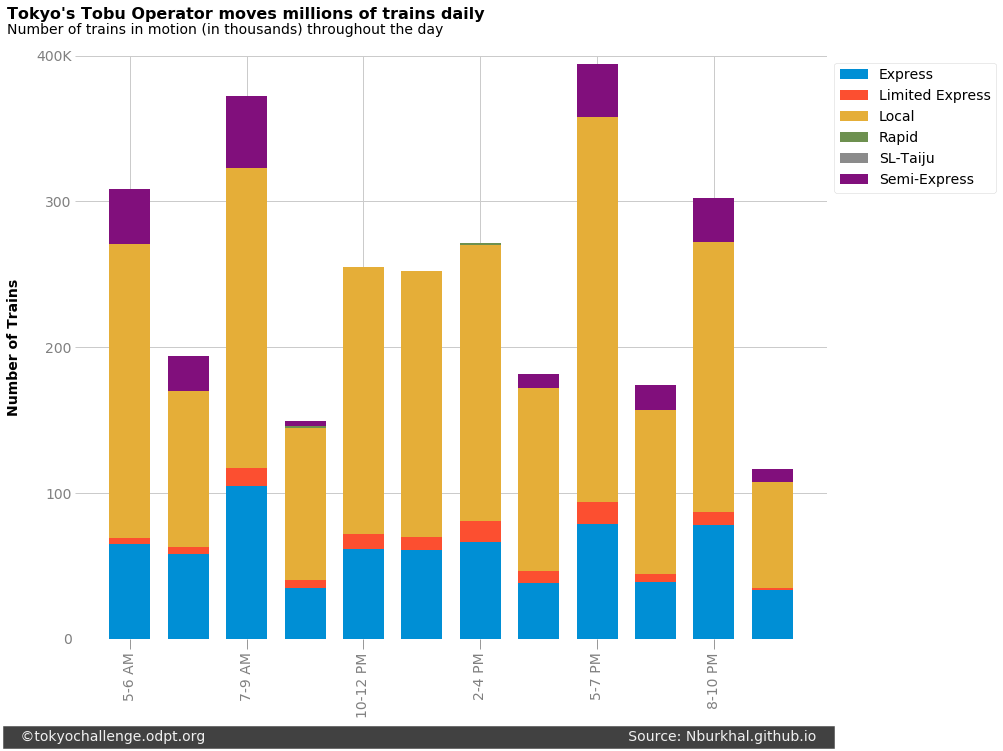

In [19]:
# Plot total number of trains by time of day
plt.style.use('fivethirtyeight')

# turn index and columns into lists for reference
time = type_by_time.index.astype(str).tolist()
express = np.array(type_by_time['Express'].tolist())
limitedexpress = np.array(type_by_time['LimitedExpress'].tolist())
local = np.array(type_by_time['Local'].tolist())
rapid = np.array(type_by_time['Rapid'].tolist())
sl_taiju = np.array(type_by_time['SL-Taiju'].tolist())
semiexpress = np.array(type_by_time['SemiExpress'].tolist())

# Create the figure
fig, ax = plt.subplots(figsize=(12, 10), facecolor='white')

# Set ax facecolor
ax.set(facecolor='white')

# Set axes plots
ax1 = ax.bar(time, express, width=0.7, label='Express', align='center')
ax2 = ax.bar(time, limitedexpress, width=0.7, label='Limited Express',
              bottom=express)
ax3 = ax.bar(time, local, width=0.7, label='Local',
              bottom=limitedexpress+express)
ax4 = ax.bar(time, rapid, width=0.7, label='Rapid',
              bottom=local+limitedexpress+express)
ax5 = ax.bar(time, sl_taiju, width=0.7, label='SL-Taiju',
              bottom=rapid+local+limitedexpress+express)
ax6 = ax.bar(time, semiexpress, width=0.7, label='Semi-Express',
              bottom=sl_taiju+rapid+local+limitedexpress+express)


# Extend y axis
plt.ylim(-5, 400000)

# Set Y tick labels
ax.set_yticks([0, 100000, 200000, 300000, 400000])
ax.set_yticklabels(labels=['0', '100', '200', '300', '400K'], fontsize=14);

# Set X tick labels
ax.set_xticks([time[0], time[2], time[4], time[6], time[8], time[10]])
ax.set_xticklabels(labels=["5-6 AM", "7-9 AM", "10-12 PM", "2-4 PM", "5-7 PM",
                           "8-10 PM"], 
                   fontsize=14, rotation=90);

# Extend x & y-axis ticks
ax.tick_params(axis='x', which='major', direction='out', 
              length=10, colors='gray')
ax.tick_params(axis='y', which='major', colors='gray')



# Set title and subtitle
ax.text(x=-2.1, y=425000, s="Tokyo's Tobu Operator moves millions of trains daily", 
        fontweight="bold", fontsize='16', fontname='Dejavu sans')
ax.text(x=-2.1, y=415000, s="Number of trains in motion (in thousands) throughout the day", fontsize=14, 
       fontname='Dejavu sans');

# Set axis labels
plt.ylabel(ylabel='Number of Trains', fontsize=14, fontweight='bold', 
           fontname='Dejavu sans', labelpad=15)

# Remove gray border around ax
plt.box(on=None)


# Add legend outside the plot
plt.legend(loc="upper left", bbox_to_anchor=(1,1), facecolor='white')

# Line at the bottom for signature
plt.text(x = -2.1, y = -70000,
    s = '   ©tokyochallenge.odpt.org                                           \
                                                   Source: Nburkhal.github.io   ',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = '#414141');


plt.show();

In [20]:
# Find percentages of train types by time
type_by_time_pct = pd.crosstab(time_bins, station_df['train_type'], 
                               normalize='index') * 100
type_by_time_pct = type_by_time_pct.drop(columns=['LimitedExpress', 'Rapid', 'SL-Taiju'])
type_by_time_pct

train_type,Express,Local,SemiExpress
departure_time,,,
"(-0.001, 6.0]",20.948007,65.314437,12.379928
"(6.0, 7.0]",30.074901,55.417119,12.098765
"(7.0, 9.0]",28.072391,55.344141,13.212180
"(9.0, 10.0]",23.237874,69.845981,2.445318
"(10.0, 12.0]",24.054821,71.685406,0.090950
"(12.0, 14.0]",24.059579,72.355411,0.000000
"(14.0, 16.0]",24.507316,69.932293,0.000000
"(16.0, 17.0]",21.024015,69.247617,5.274164
"(17.0, 19.0]",19.977376,66.975088,9.192778


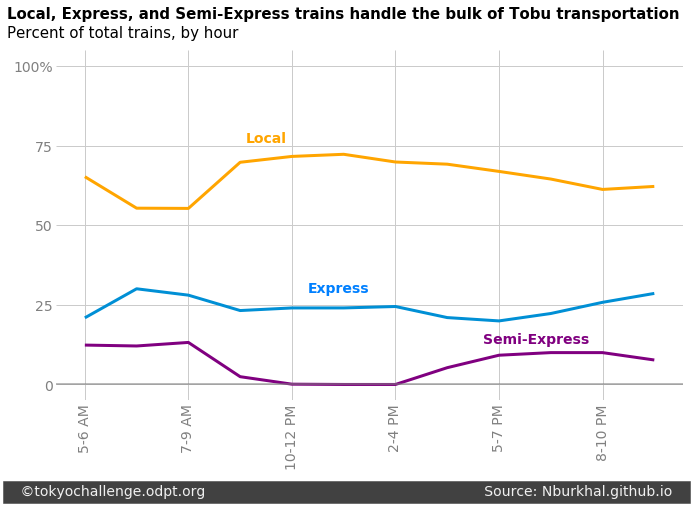

In [21]:
# Plot the top 3 trains' percentage of use throughout the day
# Top 3 most used trains: Local, Express, Semi-Express

plt.style.use('fivethirtyeight')

# turn index and columns into lists for reference
time = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
express = type_by_time_pct['Express'].tolist()
local = type_by_time_pct['Local'].tolist()
semiexpress = type_by_time_pct['SemiExpress'].tolist()

# Create the figure
fig, ax = plt.subplots(figsize=(10,6), facecolor='white')

# Set ax facecolor
ax.set(facecolor='white')

# Set axes plots
ax1 = sns.lineplot(x=time, y=express, linewidth=3)
ax2 = sns.lineplot(x=time, y=local, color='orange', linewidth=3)
ax3 = sns.lineplot(x=time, y=semiexpress, color='purple', linewidth=3)


# Extend y axis
plt.ylim(-5, 105)


# Bolded horizontal line at 0 & 100
ax.axhline(y=0, color='gray', linewidth=1.5, alpha=0.7);


# Set Y tick labels
ax.set_yticks([0, 25, 50, 75, 100])
ax.set_yticklabels(labels=['0', '25', '50', '75', '100%'], fontsize=14);

# Set X tick labels
ax.set_xticks([time[0], time[2], time[4], time[6], time[8], time[10]])
ax.set_xticklabels(labels=["5-6 AM", "7-9 AM", "10-12 PM", "2-4 PM", "5-7 PM",
                           "8-10 PM"], 
                   fontsize=14, rotation=90);

# Extend x & y-axis ticks
ax.tick_params(axis='x', which='major', colors='gray')
ax.tick_params(axis='y', which='major', colors='gray')


# Title & subtitle text
ax.text(x=-.5, y=115, s="Local, Express, and Semi-Express trains handle the bulk of Tobu transportation", fontsize=15, 
       fontweight='semibold');
ax.text(x=-.5, y=109, s='Percent of total trains, by hour', fontsize=15);


# Text labels for each plotted line
ax.text(x=4.1, y=76, s='Local', fontsize=14, 
       fontweight='semibold', color='orange');
ax.text(x=5.3, y=29, s='Express', fontsize=14, 
       fontweight='semibold', color='#0080ff');
ax.text(x=8.7, y=13, s='Semi-Express', fontsize=14, 
       fontweight='semibold', color='purple');


# Remove gray border around ax
plt.box(on=None)


# Line at the bottom for signature
plt.text(x = -.5, y = -35,
    s = '   ©tokyochallenge.odpt.org                                           \
                   Source: Nburkhal.github.io   ',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = '#414141');

In [22]:
# Create crosstab of rail direction by time of day (0 is outbound, 1 is inbound)
rail_direction = pd.crosstab(time_bins, station_df['rail_direction'])
rail_direction

rail_direction,0,1
departure_time,,
"(-0.001, 6.0]",157316,151458
"(6.0, 7.0]",99218,94372
"(7.0, 9.0]",184446,187756
"(9.0, 10.0]",67426,82166
"(10.0, 12.0]",113252,141832
"(12.0, 14.0]",111812,140628
"(14.0, 16.0]",117166,154002
"(16.0, 17.0]",91340,90376
"(17.0, 19.0]",198412,195854


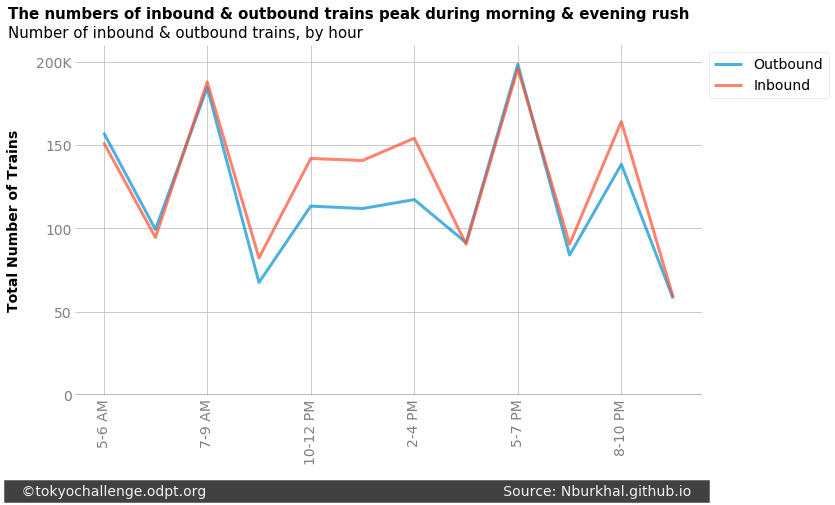

In [23]:
# Plot line graph of inbound & outbound trains throughout the day

plt.style.use('fivethirtyeight')

# turn index and columns into lists for reference
time = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
outbound = rail_direction[0].tolist()
inbound = rail_direction[1].tolist()

# Create the figure
fig, ax = plt.subplots(figsize=(10,6), facecolor='white')

# Set ax facecolor
ax.set(facecolor='white')

# Set axes plots
ax1 = sns.lineplot(x=time, y=outbound, label='Outbound', 
                   linewidth=3, alpha=0.7)
ax2 = sns.lineplot(x=time, y=inbound, label='Inbound', 
                   linewidth=3, alpha=0.7)


# Extend y axis
plt.ylim(-5, 210000)


# Bolded horizontal line at 0 & 100
ax.axhline(y=0, color='gray', linewidth=1.5, alpha=0.7);


# Set Y tick labels
ax.set_yticks([0, 50000, 100000, 150000, 200000])
ax.set_yticklabels(labels=['0', '50', '100', '150', '200K'], fontsize=14);

# Set X tick labels
ax.set_xticks([time[0], time[2], time[4], time[6], time[8], time[10]])
ax.set_xticklabels(labels=["5-6 AM", "7-9 AM", "10-12 PM", "2-4 PM", "5-7 PM",
                           "8-10 PM"], 
                   fontsize=14, rotation=90);

# Extend x & y-axis ticks
ax.tick_params(axis='x', which='major', colors='gray')
ax.tick_params(axis='y', which='major', colors='gray')

# Set axis labels
plt.ylabel(ylabel='Total Number of Trains', fontsize=14, fontweight='bold', 
           fontname='Dejavu sans', labelpad=15)


# Title & subtitle text
ax.text(x=-.85, y=226000, s="The numbers of inbound & outbound trains peak during morning & evening rush", fontsize=15, 
       fontweight='semibold');
ax.text(x=-.85, y=215000, s='Number of inbound & outbound trains, by hour', fontsize=15);


# Remove gray border around ax
plt.box(on=None)


# Add legend outside the plot
plt.legend(loc="upper left", bbox_to_anchor=(1,1), facecolor='white')


# Line at the bottom for signature
plt.text(x = -.85, y = -60000,
    s = '   ©tokyochallenge.odpt.org                                           \
                       Source: Nburkhal.github.io   ',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = '#414141');

In [24]:
# See percentage breakdown of rail direction by time of day
rail_direction_pct = pd.crosstab(time_bins, station_df['rail_direction'], 
                                 normalize='index') * 100
rail_direction_pct

rail_direction,0,1
departure_time,,
"(-0.001, 6.0]",50.948590,49.051410
"(6.0, 7.0]",51.251614,48.748386
"(7.0, 9.0]",49.555349,50.444651
"(9.0, 10.0]",45.073266,54.926734
"(10.0, 12.0]",44.397924,55.602076
"(12.0, 14.0]",44.292505,55.707495
"(14.0, 16.0]",43.207901,56.792099
"(16.0, 17.0]",50.265249,49.734751
"(17.0, 19.0]",50.324400,49.675600


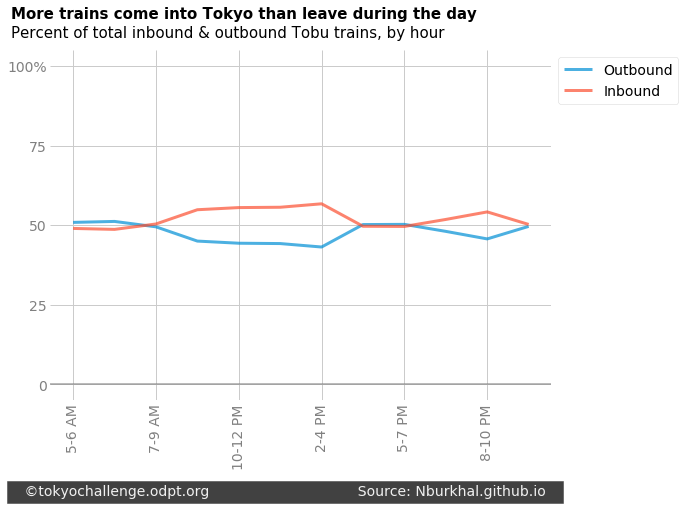

In [25]:
# Plot percentage of inbound and outbound trains throughout the day

plt.style.use('fivethirtyeight')

# turn index and columns into lists for reference
time = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
outbound = rail_direction_pct[0].tolist()
inbound = rail_direction_pct[1].tolist()

# Create the figure
fig, ax = plt.subplots(figsize=(8,6), facecolor='white')

# Set ax facecolor
ax.set(facecolor='white')

# Set axes plots
ax1 = sns.lineplot(x=time, y=outbound, label='Outbound', 
                   linewidth=3, alpha=0.7)
ax2 = sns.lineplot(x=time, y=inbound, label='Inbound', 
                   linewidth=3, alpha=0.7)


# Extend y axis
plt.ylim(-5, 105)


# Bolded horizontal line at 0 & 100
ax.axhline(y=0, color='gray', linewidth=1.5, alpha=0.7);


# Set Y tick labels
ax.set_yticks([0, 25, 50, 75, 100])
ax.set_yticklabels(labels=['0', '25', '50', '75', '100%'], fontsize=14);

# Set X tick labels
ax.set_xticks([time[0], time[2], time[4], time[6], time[8], time[10]])
ax.set_xticklabels(labels=["5-6 AM", "7-9 AM", "10-12 PM", "2-4 PM", "5-7 PM",
                           "8-10 PM"], 
                   fontsize=14, rotation=90);

# Extend x & y-axis ticks
ax.tick_params(axis='x', which='major', colors='gray')
ax.tick_params(axis='y', which='major', colors='gray')


# Title & subtitle text
ax.text(x=-.5, y=115, s="More trains come into Tokyo than leave during the day", fontsize=15, 
       fontweight='semibold');
ax.text(x=-.5, y=109, s='Percent of total inbound & outbound Tobu trains, by hour', 
        fontsize=15);


# Remove gray border around ax
plt.box(on=None)


# Add legend outside the plot
plt.legend(loc="upper left", bbox_to_anchor=(1,1), facecolor='white')


# Line at the bottom for signature
plt.text(x = -.5, y = -35,
    s = '   ©tokyochallenge.odpt.org              \
                   Source: Nburkhal.github.io   ',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = '#414141');

In [0]:
# Create crosstab to see number of inbound & outbound trains per station
trains_per_station = pd.crosstab(station_df['title'], station_df['rail_direction'])

# Filter crosstab to show only the busiest stations (busiest defined as 20K or more inbound trains)
trains_per_station = trains_per_station[trains_per_station[1] > 20000]

In [27]:
# Translate trains_per_station index
trains_per_station = trains_per_station.rename(index={'せんげん台': 'Sengendai', 'とうきょうスカイツリー': 'Tokyo Skytree', 
                                                      '一ノ割': 'Ichinowari', '五反野': 'Gotanno', '北千住': 'Kita-senju', '北春日部': 'Kita-kasukabe', 
                                                      '北越谷': 'Kita-koshigaya', '堀切': 'Horikiri', '大袋': 'Oobukuro', 
                                                      '姫宮': 'Himemiya', '小菅': 'Kosuge', '新田': 'Shinden', 
                                                      '新越谷': 'Shinkoshigaya', '春日部': 'Kasukabe', '曳舟': 'Hikifune', 
                                                      '東向島': 'Higashi-mukoujima', '東武動物公園': 'Tobu Zoo', '梅島': 'Umejima', 
                                                      '武里': 'Takesato', '浅草': 'Asakusa', '牛田': 'Ushida', 
                                                      '獨協大学前<草加松原>': 'Tokyo University/Soukamatsubara', '竹ノ塚': 'Takenotsuka', 
                                                      '草加': 'Souka', '蒲生': 'Gamou', '西新井': 'Nishi-arai', 
                                                      '谷塚': 'Yatsuka', '越谷': 'Koshigaya', '鐘ヶ淵': 'Kanegafuchi'})

trains_per_station

rail_direction,0,1
title,,
Sengendai,20890,21360
Tokyo Skytree,20890,21360
Ichinowari,20890,21360
Gotanno,20890,21360
Kita-senju,20890,21360
Kita-kasukabe,20890,21360
Kita-koshigaya,20890,21360
Horikiri,20890,21360
Oobukuro,20890,21360


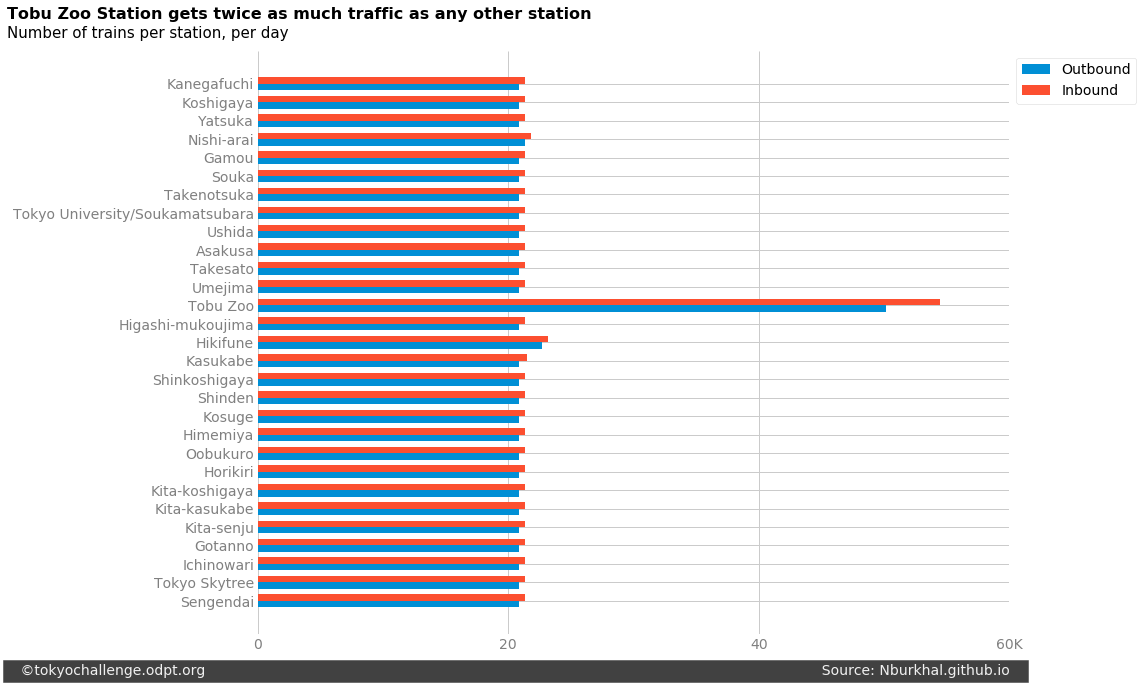

In [28]:
# Plot the number of trains per station

plt.style.use('fivethirtyeight')

# turn index and columns into lists for reference
stations = trains_per_station.index.astype(str).tolist()
outbound = np.array(trains_per_station[0].tolist())
inbound = np.array(trains_per_station[1].tolist())


x = np.arange(len(stations))  # the label locations
width = 0.35  # the width of the bars

# Create the figure
fig, ax = plt.subplots(figsize=(12, 10), facecolor='white')

# Set ax facecolor
ax.set(facecolor='white')


# Set axes plots
ax1 = ax.barh(x - width/2, outbound, width, label='Outbound')
ax2 = ax.barh(x + width/2, inbound, width, label='Inbound')


# Extend x axis
plt.xlim(-5, 60000)

# Set X tick labels
ax.set_xticks([0, 20000, 40000, 60000])
ax.set_xticklabels(labels=['0', '20', '40', '60K'], fontsize=14);

# Set Y tick labels
ax.set_yticks(x)
ax.set_yticklabels(stations);

# Extend x & y-axis ticks
ax.tick_params(axis='x', which='major', colors='gray')
ax.tick_params(axis='y', which='major', colors='gray')



# Set title and subtitle
ax.text(x=-20000, y=31.5, s="Tobu Zoo Station gets twice as much traffic as any other station", 
        fontweight="bold", fontsize='16', fontname='Dejavu sans')
ax.text(x=-20000, y=30.5, s="Number of trains per station, per day", fontsize=15, 
       fontname='Dejavu sans');


# Remove gray border around ax
plt.box(on=None)


# Add legend outside the plot
plt.legend(loc="upper left", bbox_to_anchor=(1,1), facecolor='white')

# Line at the bottom for signature
plt.text(x = -20000, y = -4,
    s = '   ©tokyochallenge.odpt.org                                                                              \
                                                           Source: Nburkhal.github.io   ',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = '#414141');


plt.show();

In [29]:
# Create crosstab to see the relationship between number of trains and railway
railway_dir = pd.crosstab(station_df['railway'], station_df['rail_direction'])
railway_dir

rail_direction,0,1
railway,,
Daishi,876,876
Isesaki,356668,407316
Kameido,8920,9000
Kinugawa,6030,8964
Kiryu,672,13088
Koizumi,5376,5544
KoizumiBranch,2424,96
Nikko,403988,452712
Ogose,17920,17920


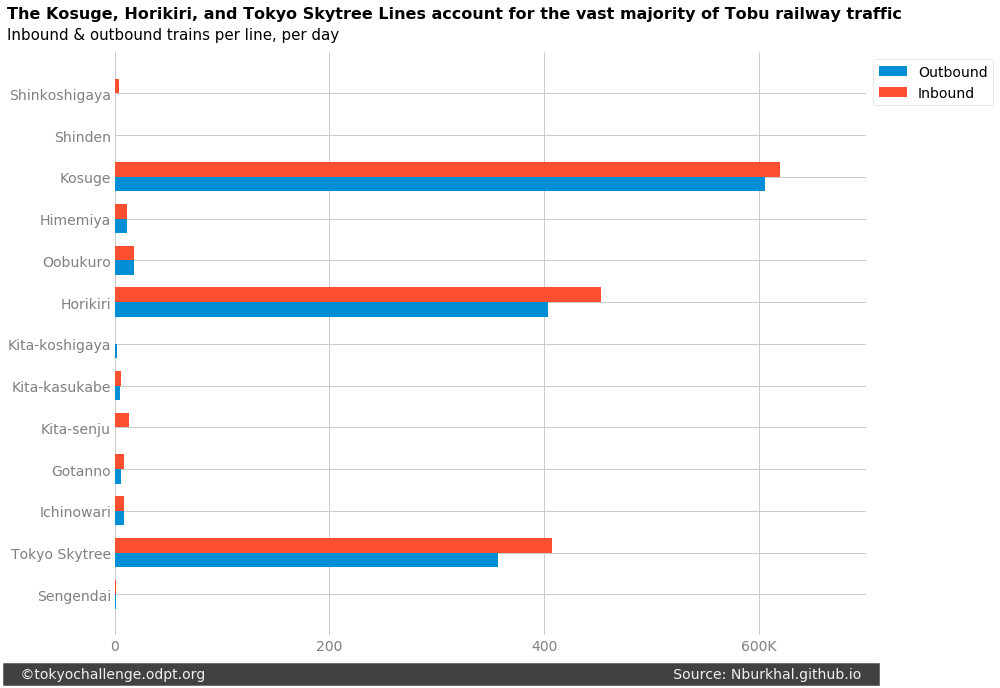

In [30]:
# Plot the number of trains per railway

plt.style.use('fivethirtyeight')

# turn index and columns into lists for reference
railways = railway_dir.index.astype(str).tolist()
outbound = np.array(railway_dir[0].tolist())
inbound = np.array(railway_dir[1].tolist())


x = np.arange(len(railways))  # the label locations
width = 0.35  # the width of the bars

# Create the figure
fig, ax = plt.subplots(figsize=(12, 10), facecolor='white')

# Set ax facecolor
ax.set(facecolor='white')


# Set axes plots
ax1 = ax.barh(x - width/2, outbound, width, label='Outbound')
ax2 = ax.barh(x + width/2, inbound, width, label='Inbound')


# Extend x axis
plt.xlim(-5, 700000)

# Set X tick labels
ax.set_xticks([0, 200000, 400000, 600000])
ax.set_xticklabels(labels=['0', '200', '400', '600K'], fontsize=14);

# Set Y tick labels
ax.set_yticks(x)
ax.set_yticklabels(stations);

# Extend x & y-axis ticks
ax.tick_params(axis='x', which='major', colors='gray')
ax.tick_params(axis='y', which='major', colors='gray')



# Set title and subtitle
ax.text(x=-100000, y=13.8, s="The Kosuge, Horikiri, and Tokyo Skytree Lines account for the vast majority of Tobu railway traffic", 
        fontweight="bold", fontsize='16', fontname='Dejavu sans')
ax.text(x=-100000, y=13.3, s="Inbound & outbound trains per line, per day", fontsize=15, 
       fontname='Dejavu sans');


# Remove gray border around ax
plt.box(on=None)


# Add legend outside the plot
plt.legend(loc="upper left", bbox_to_anchor=(1,1), facecolor='white')

# Line at the bottom for signature
plt.text(x = -100000, y = -2,
    s = '   ©tokyochallenge.odpt.org                                             \
                                                           Source: Nburkhal.github.io   ',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = '#414141');


plt.show();